In [1]:
from Get_Intervals_Online import Get_Intervals_Online
from GetIntervalsOffline import Get_Intervals_Offline
from Plot_Data import Plot_Data
from Interval_Pairplot import Interval_Pairplot
from Plot_Spikes import Plot_Spikes_Online, Plot_Spikes_Offline
from Offline_Online_Comparison import Offline_Online_Comparison

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Delayed classification

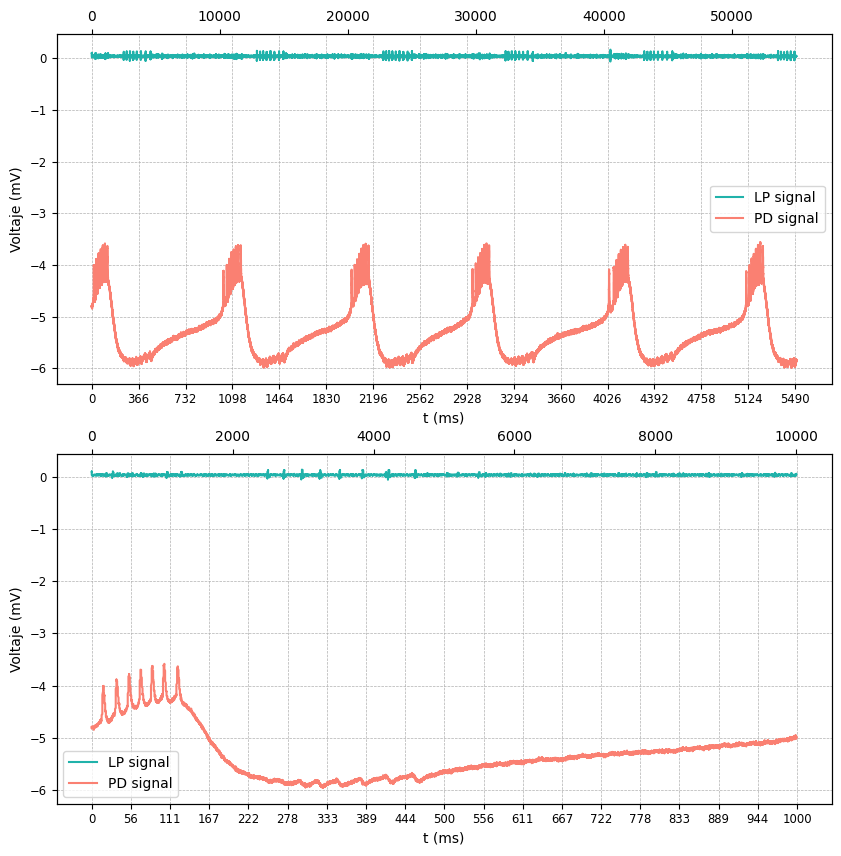

In [23]:
# We plot the data to extract principal values, such us t_cut for cycles starting with PD bursting and t_cut for LP bursting
# We could also extract the data for the analysis: in order to get the peaks we need to give a height and a prominence for each neuron,
# and, to separate them into different bursts, we need a maximum distance between 2 spikes from the same burst

Data = '../robot/txt/sub15.txt'
Plot_Data(Data)

In [40]:
# PD first: we choose the start time from graphics above

parameters_online = {"sub1.txt": [0.4, -2.7, -2.7, 4000, 4000, 500, 500, 470, 167],
                     "sub4.txt": [0.22, -3.9, -3.3, 2000, 2000, 220, 230, 500, 278],
                     "sub6.txt": [0.05, -3.5, -3.3, 10000, 10000, 550, 400, 889, 556],
                     "sub8.txt": [0.07, -3.2, -3.2, 4000, 4000, 600, 300, 778, 389],
                     "sub10.txt": [0.7, 3.1, 3.1, 9000, 8000, 500, 550, 500, 167],
                     "sub12.txt": [0.35,-0.7, -0.7, 10000, 6000, 800, 1100, 1467, 367],
                     "sub13.txt": [0.35, 1.8, 2, 3000, 3000, 350, 300, 389, 111],
                     "sub14.txt": [0.4, -3.8, -3.7, 7000, 7000, 500, 600, 833, 367],
                     "sub15.txt": [0.12, -4.3, -4.1, 7000, 6000, 650, 500, 222, 1],
                     "sub16.txt": [0.4, -3.8, -3.75, 9000, 9000, 800, 550, 833, 444]
                     }

first_neuron = 'PD'


campaign = parameters_online[Data[13:]]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

spiking_height_LP = campaign[0]
spiking_height_PD_1 = campaign[1]
spiking_height_PD_2 = campaign[2]
min_period_LP = campaign[3]*t_cut
min_period_PD = campaign[4]*t_cut
max_burst_LP = campaign[5]*t_cut
max_burst_PD = campaign[6]*t_cut

method = 'Delayed'
t, V_PD, V_LP, t_PD_del, t_LP_del, processing_time, Intervals,  t_detect_LP, t_detect_PD = Get_Intervals_Online(method, Data, t_cut, spiking_height_LP, spiking_height_PD_1, spiking_height_PD_2, min_period_LP, min_period_PD, max_burst_LP, max_burst_PD)

PD ini 189
PD fini 189
LP ini 189
LP fini 188


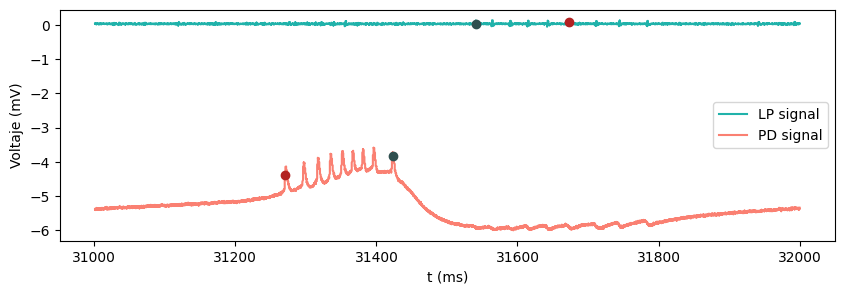

In [45]:
Plot_Spikes_Online(t, V_PD, V_LP, t_PD_del, t_LP_del, 310000, 320000)

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

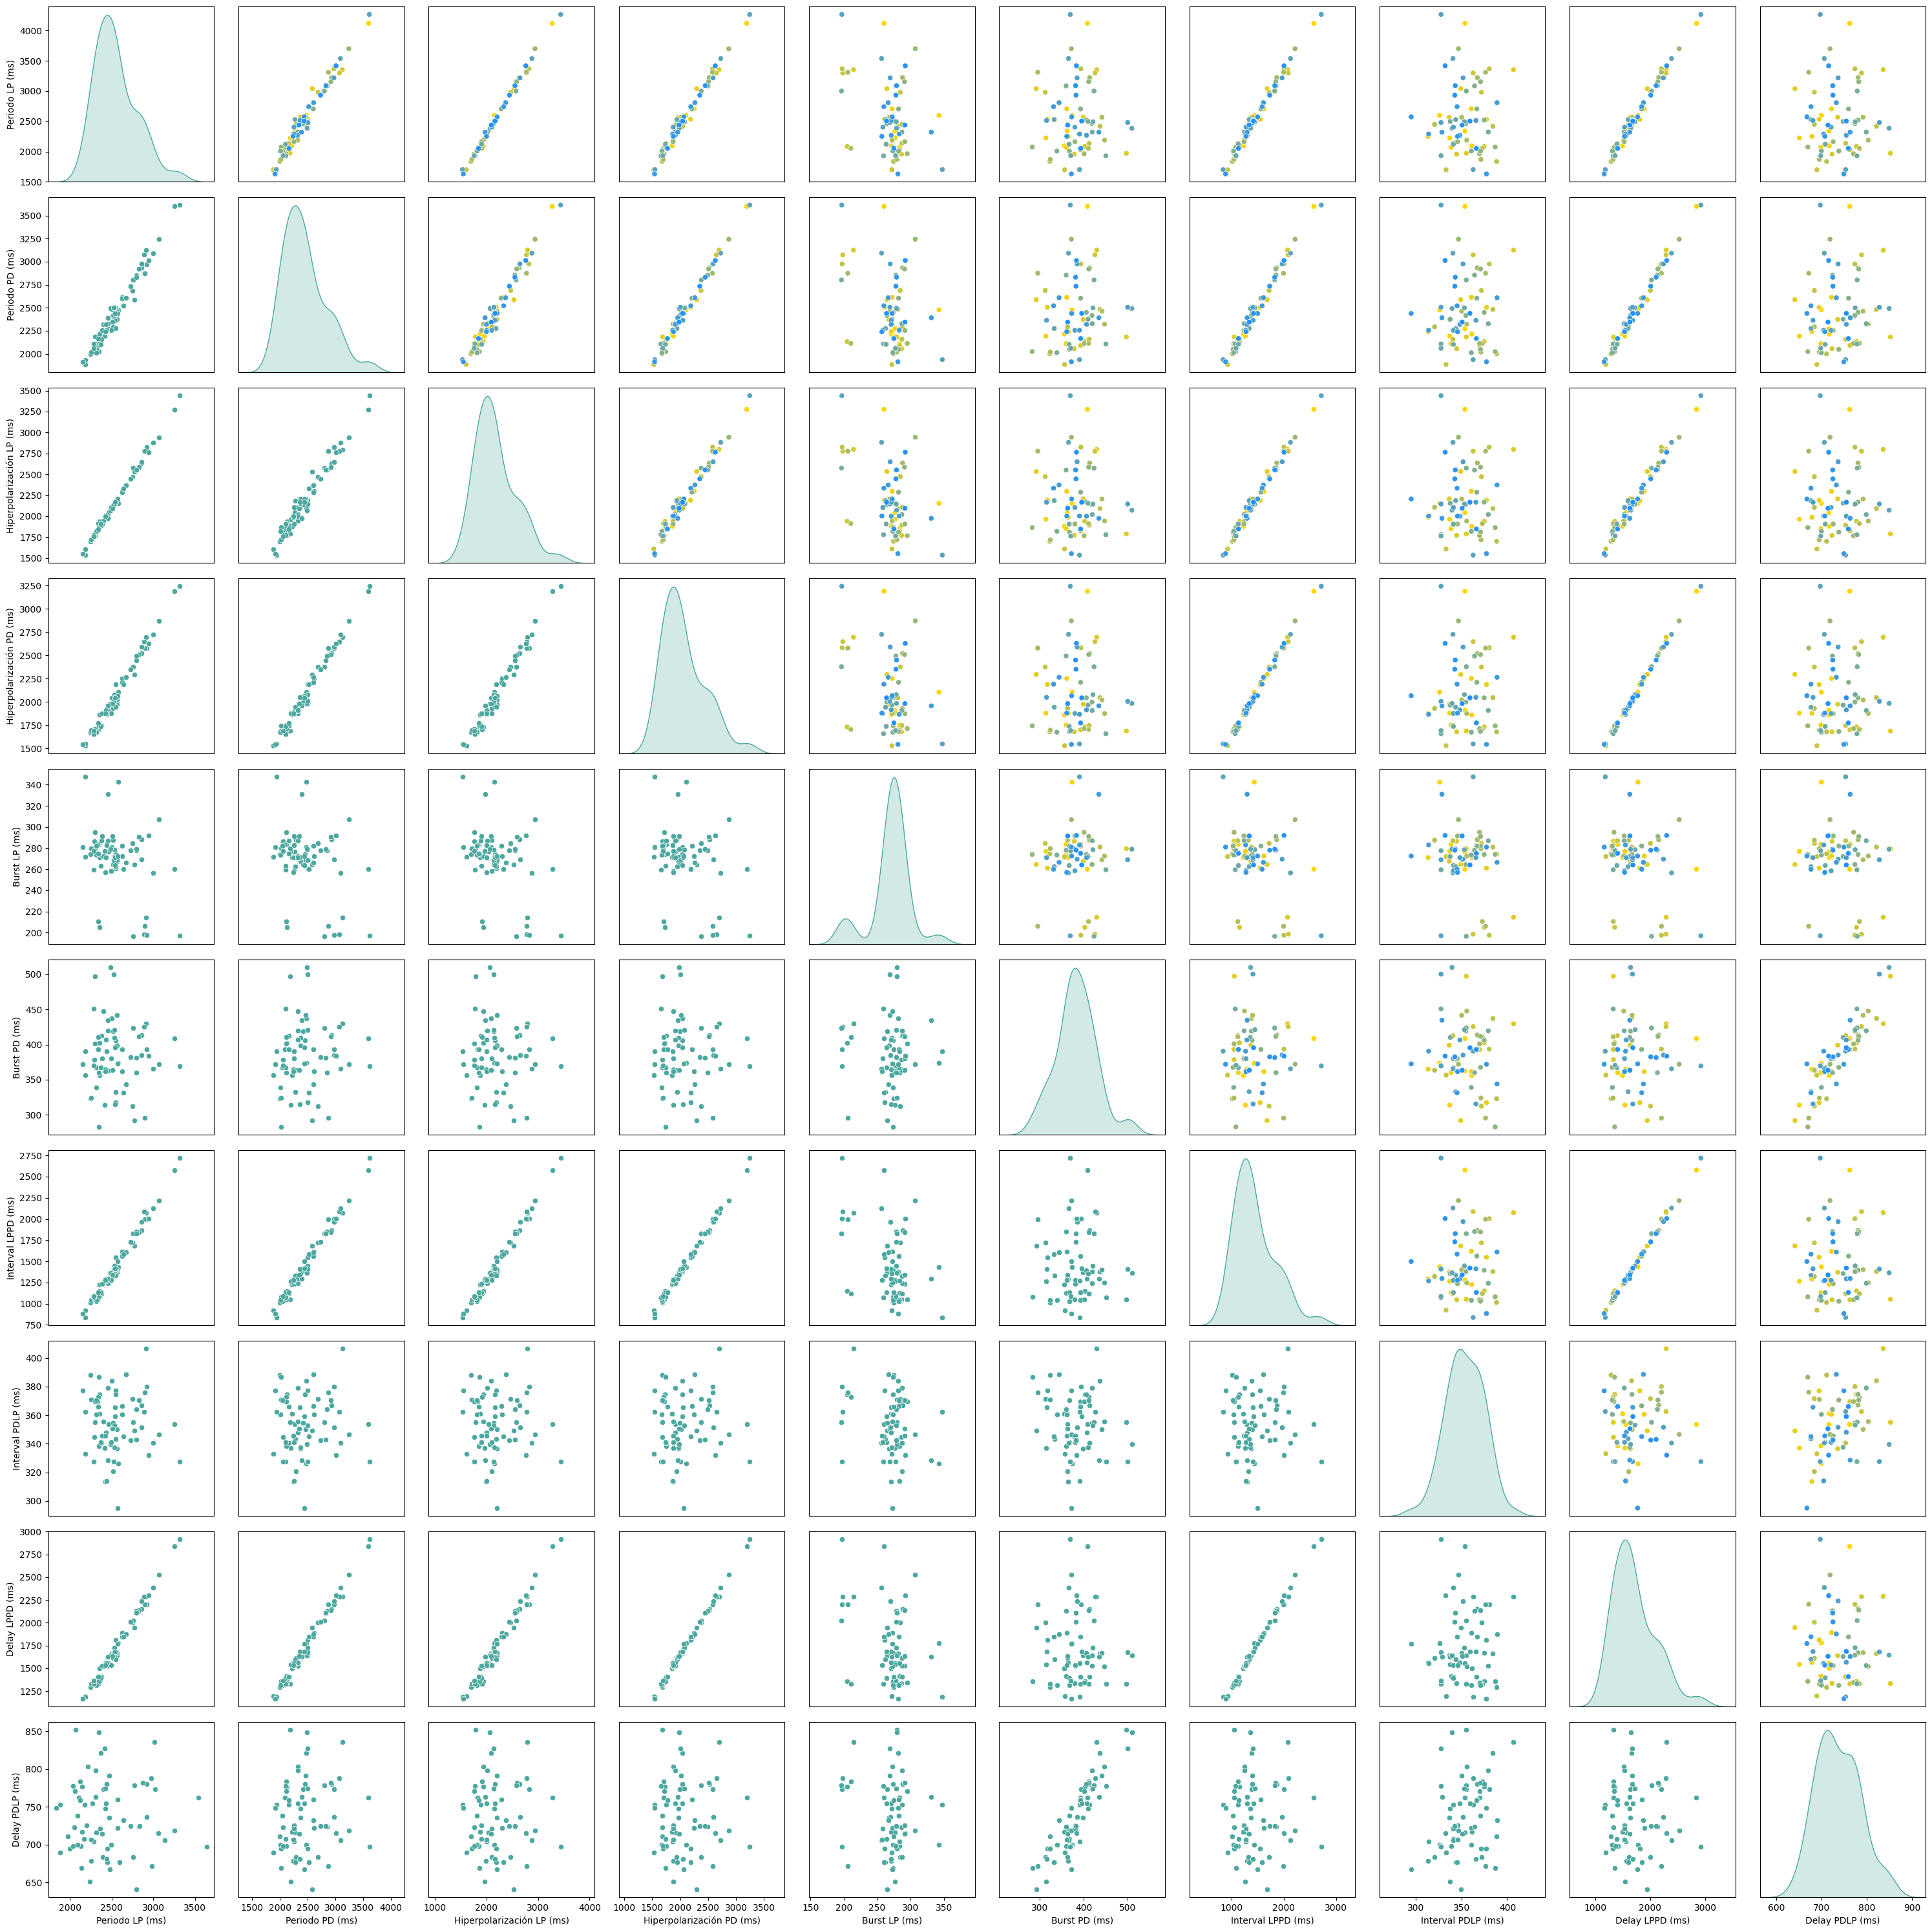

In [ ]:
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue="Normal")

## Instant classification

In [ ]:
# PD first: we choose the start time from graphics above
t_cut = 56
first_neuron = 'PD'

spiking_height_LP = 0.35
spiking_height_PD = -3.9
no_spiking_height_LP = 0.33
no_spiking_height_PD = -1
min_period_LP = 10000*t_cut
min_period_PD = 10000*t_cut
max_burst_LP = 2000*t_cut
max_burst_PD = 2500*t_cut
prominence_PD = 0.2

method = 'Instant'
t, V_PD, V_LP, t_PD_i, t_LP_i, processing_time_i, Intervals_i = Get_Intervals_Online(method, Data, t_cut, spiking_height_LP, spiking_height_PD, no_spiking_height_LP, no_spiking_height_PD, min_period_LP, min_period_PD, max_burst_LP, max_burst_PD, prominence_PD)

TypeError: Get_Intervals_Online() takes 10 positional arguments but 12 were given

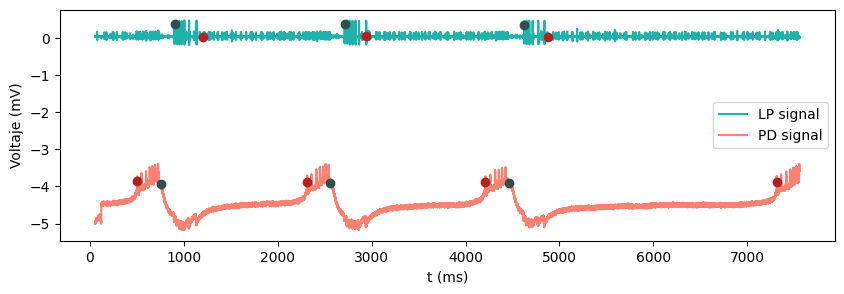

In [ ]:
Plot_Spikes_Online(t, V_PD, V_LP, t_PD_i, t_LP_i, 0, 75000)

How much time passes on Delayed classification until PD last spike is classified as last spike?

In [ ]:
dif_inis_PD = np.sum(np.abs(t_PD_i-t_PD)[:,0])/len(t_PD)
dif_finis_PD = np.sum(np.abs((t_PD_i-t_PD)[:,1]))/len(t_PD)

dif_inis_LP = np.sum(np.abs((t_LP_i-t_LP)[:,0]))/len(t_LP)
dif_finis_LP = np.sum(np.abs((t_LP_i-t_LP)[:,1]))/len(t_LP)

print('Mean PD First Spike retarded time: ', dif_inis_PD, ' ms')
print('Mean PD Final Spike retarded time: ', dif_finis_PD, ' ms')

print('Mean LP First Spike retarded time: ', dif_inis_LP, ' ms')
print('Mean LP Final Spike retarded time: ', dif_finis_LP, ' ms')

Mean PD First Spike retarded time:  0.0  ms
Mean PD Final Spike retarded time:  22.825367647058822  ms
Mean LP First Spike retarded time:  0.0  ms
Mean LP Final Spike retarded time:  86.84558823529412  ms


## Compare Delayed-Online with offline analysis

In [ ]:
# PD first: we choose the start time from graphics above
t_cut = 444
first_neuron = 'PD'

prominence_LP_1 = 0.45
prominence_LP_2 = 4
height_LP = 0.3
prominence_PD_1 = 0.25
prominence_PD_2 = 4
height_PD = -4
dist_LP = 985*t_cut
dist_PD = 5000*t_cut

t, V_PD, V_LP, slices_PD_off, slices_LP_off, Intervals_off = Get_Intervals_Offline(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)

Error between the detected initial and final spikes:

In [ ]:
t_PD_off_1 = [i[0] for i in slices_PD_off]
t_PD_off_1 = t[t_PD_off_1]
t_PD_off_2 = [i[-1] for i in slices_PD_off]
t_PD_off_2 = t[t_PD_off_2]

t_PD_off = np.concatenate((np.array(t_PD_off_1).reshape(-1,1), np.array(t_PD_off_2).reshape(-1,1)), axis=1)

t_LP_off_1 = [i[0] for i in slices_LP_off]
t_LP_off_1 = t[t_LP_off_1]
t_LP_off_2 = [i[-1] for i in slices_LP_off]
t_LP_off_2 = t[t_LP_off_2]

t_LP_off = np.concatenate((np.array(t_LP_off_1).reshape(-1,1), np.array(t_LP_off_2).reshape(-1,1)), axis=1)



dif_inis_PD = np.sum((t_PD_off - t_PD_del)[:,0])/len(t_PD_del)
dif_finis_PD = np.sum((t_PD_off - t_PD_del)[:,1])/len(t_PD_del)

dif_inis_LP = np.sum((t_LP_off - t_LP_del)[:,0])/len(t_LP_del)
dif_finis_LP = np.sum((t_LP_off - t_LP_del)[:,1])/len(t_LP_del)

print('Mean PD First Spike retarded time between Offline and Online-Delayed: ', dif_inis_PD, ' ms')
print('Mean PD Final Spike retarded timebetween Offline and Online-Delayed: ', dif_finis_PD, ' ms')

print('Mean LP First Spike retarded timebetween Offline and Online-Delayed: ', dif_inis_LP, ' ms')
print('Mean LP Final Spike retarded timebetween Offline and Online-Delayed: ', dif_finis_LP, ' ms')

Mean PD First Spike retarded time between Offline and Online-Delayed:  0.9522058823529411  ms
Mean PD Final Spike retarded timebetween Offline and Online-Delayed:  0.9301470588235294  ms
Mean LP First Spike retarded timebetween Offline and Online-Delayed:  0.10477941176470588  ms
Mean LP Final Spike retarded timebetween Offline and Online-Delayed:  30.25735294117647  ms


c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

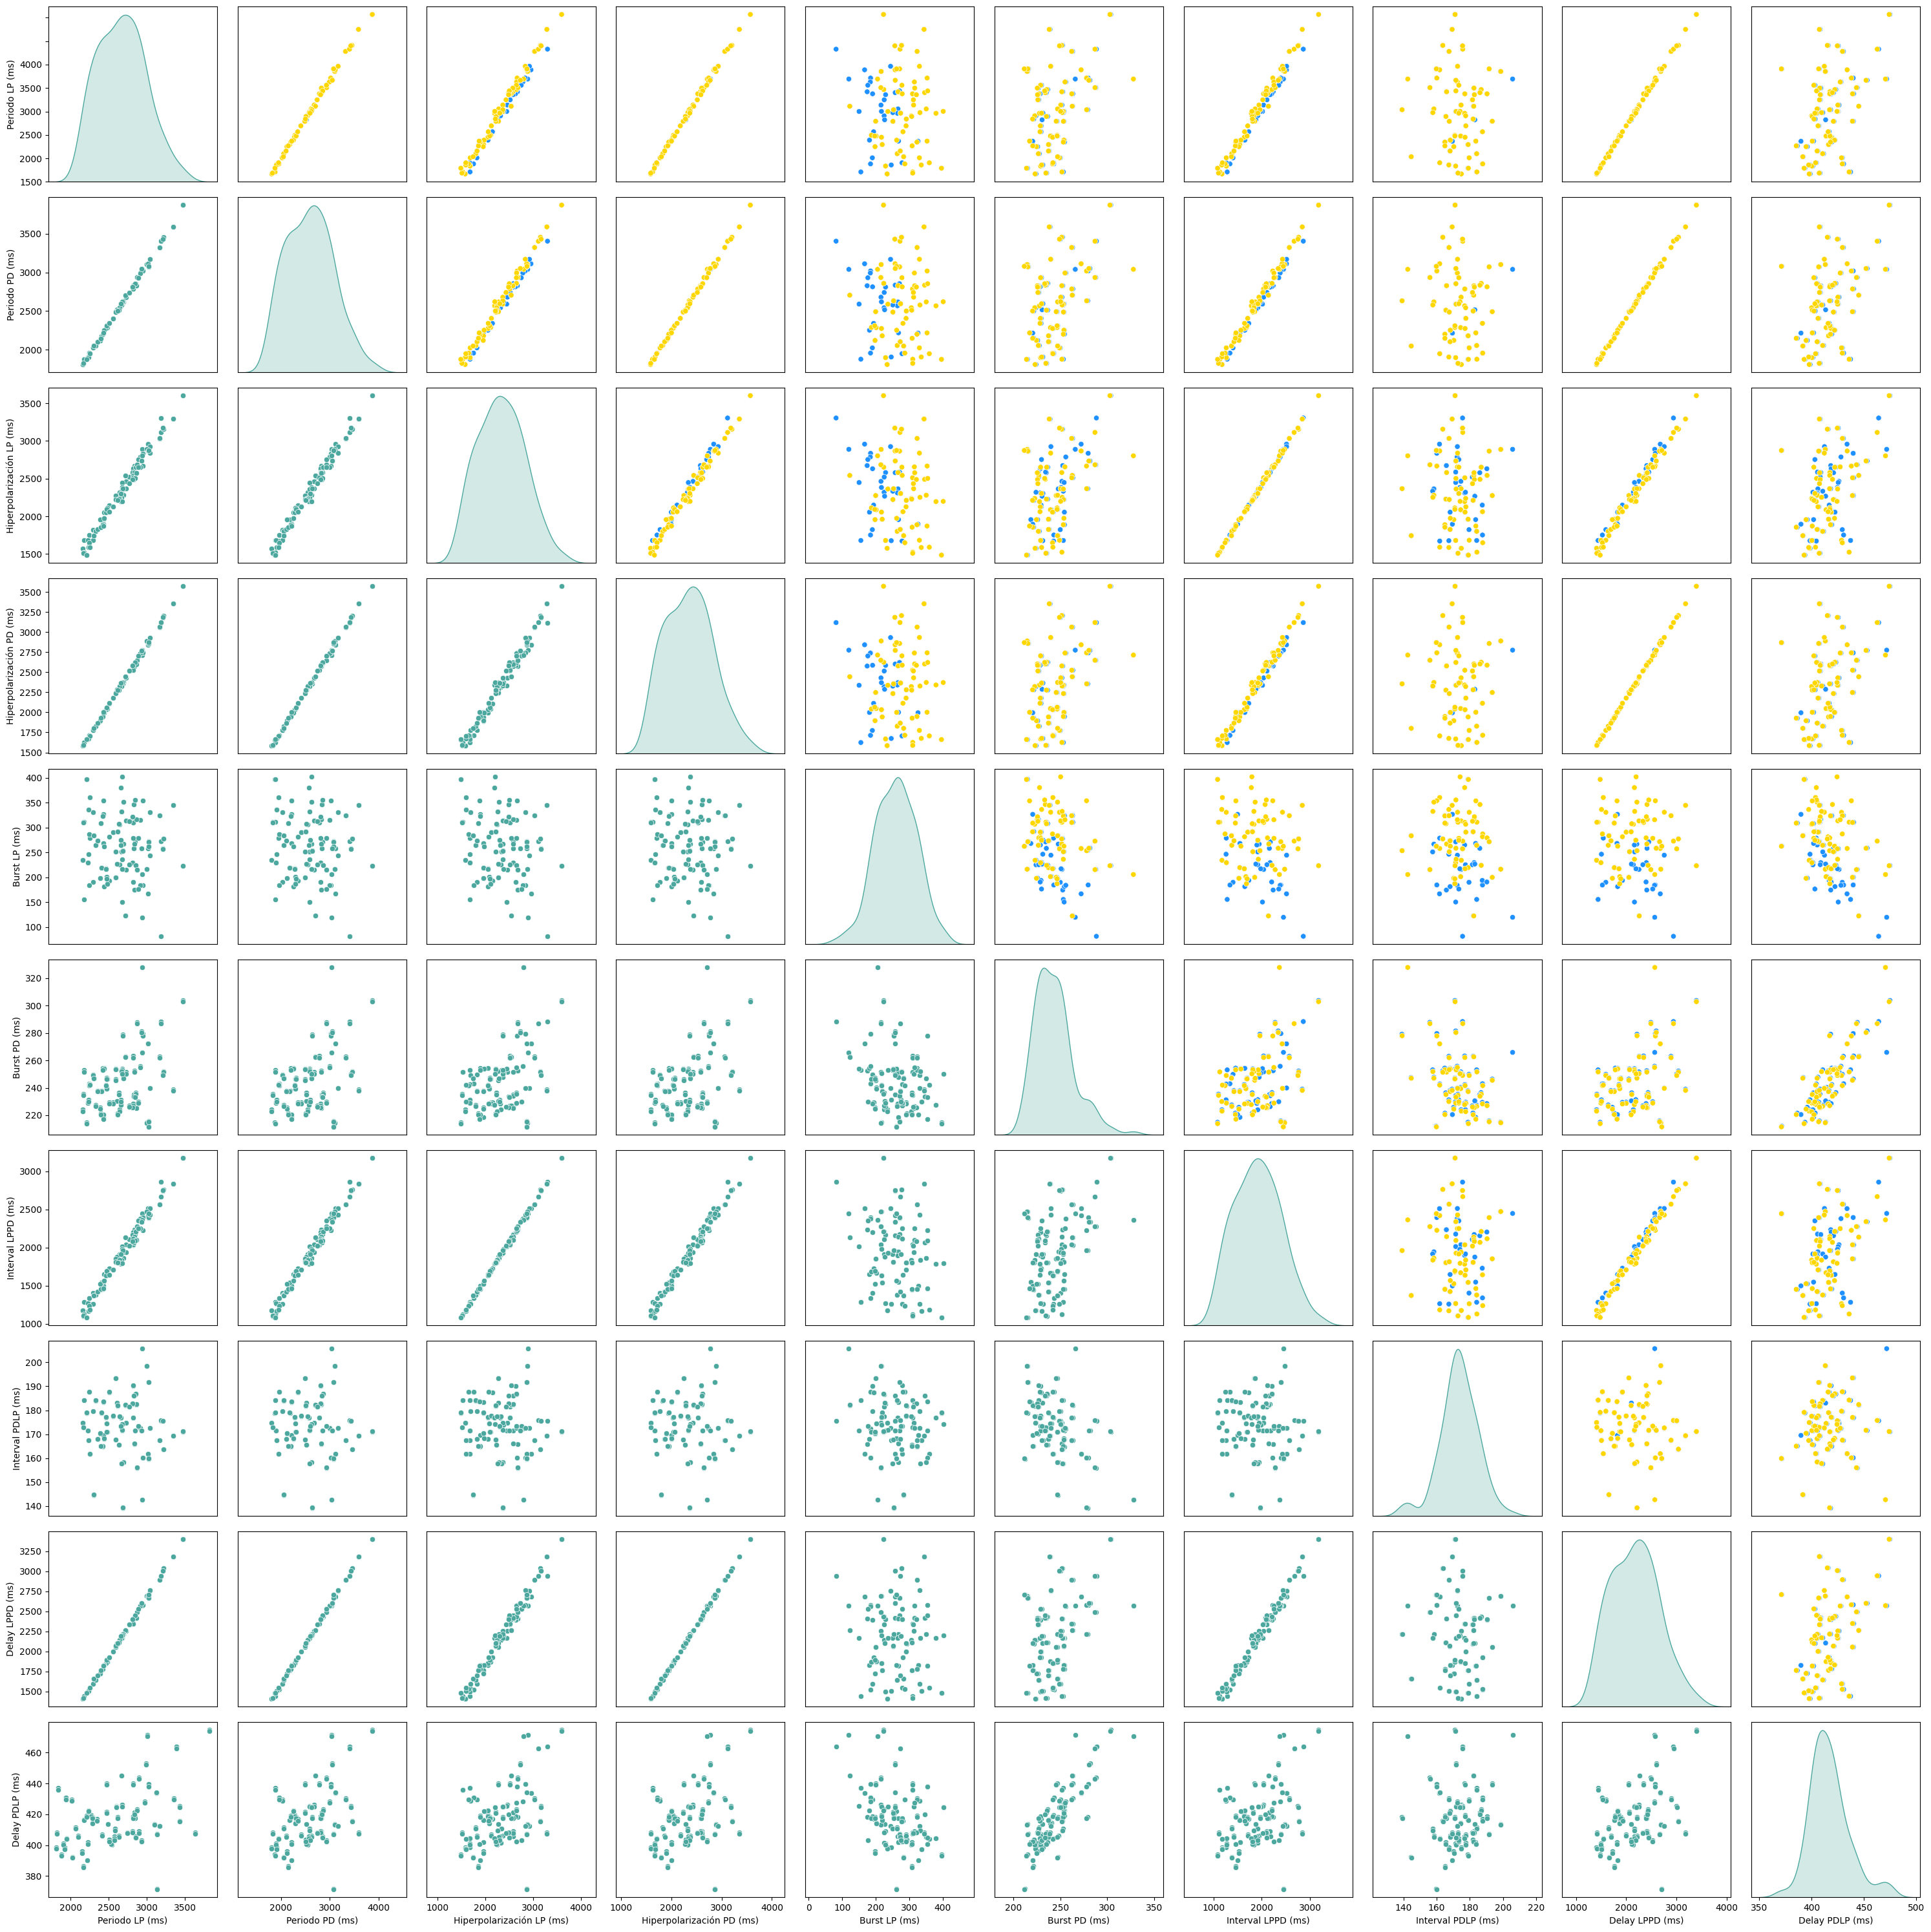

In [ ]:
merged_Intervals = np.concatenate((Intervals, Intervals_off), axis=0)
Hue = np.concatenate((np.ones(len(Intervals)),np.zeros(len(Intervals_off))))
Interval_Pairplot(merged_Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue=Hue)

## Other Datasets: Comparison Online-Delayed VS Offline

sub1.txt
PD ini 218
PD fini 218
LP ini 219
LP fini 219
sub4.txt
PD ini 414
PD fini 414
LP ini 413
LP fini 413
sub6.txt
PD ini 107
PD fini 107
LP ini 106
LP fini 106
sub8.txt
PD ini 295
PD fini 295
LP ini 294
LP fini 294
sub10.txt
PD ini 111
PD fini 110
LP ini 110
LP fini 110
sub12.txt
PD ini 73
PD fini 73
LP ini 74
LP fini 74
sub13.txt
PD ini 307
PD fini 307
LP ini 307
LP fini 306
sub14.txt
PD ini 179
PD fini 179
LP ini 179
LP fini 178
sub15.txt
PD ini 189
PD fini 189
LP ini 189
LP fini 188
sub16.txt
PD ini 69
PD fini 69
LP ini 68
LP fini 68


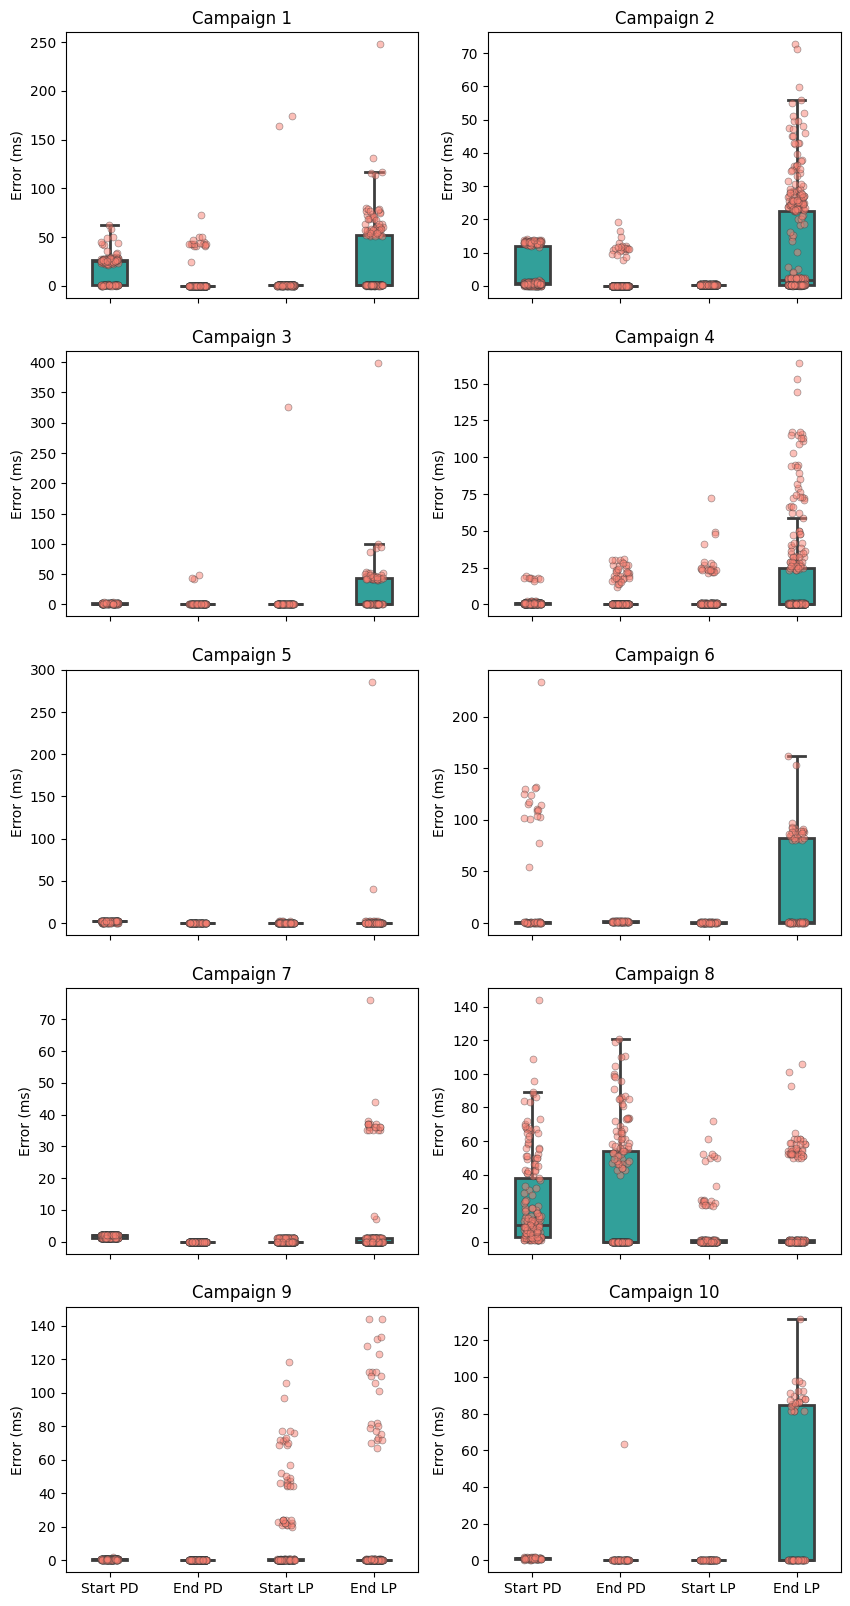

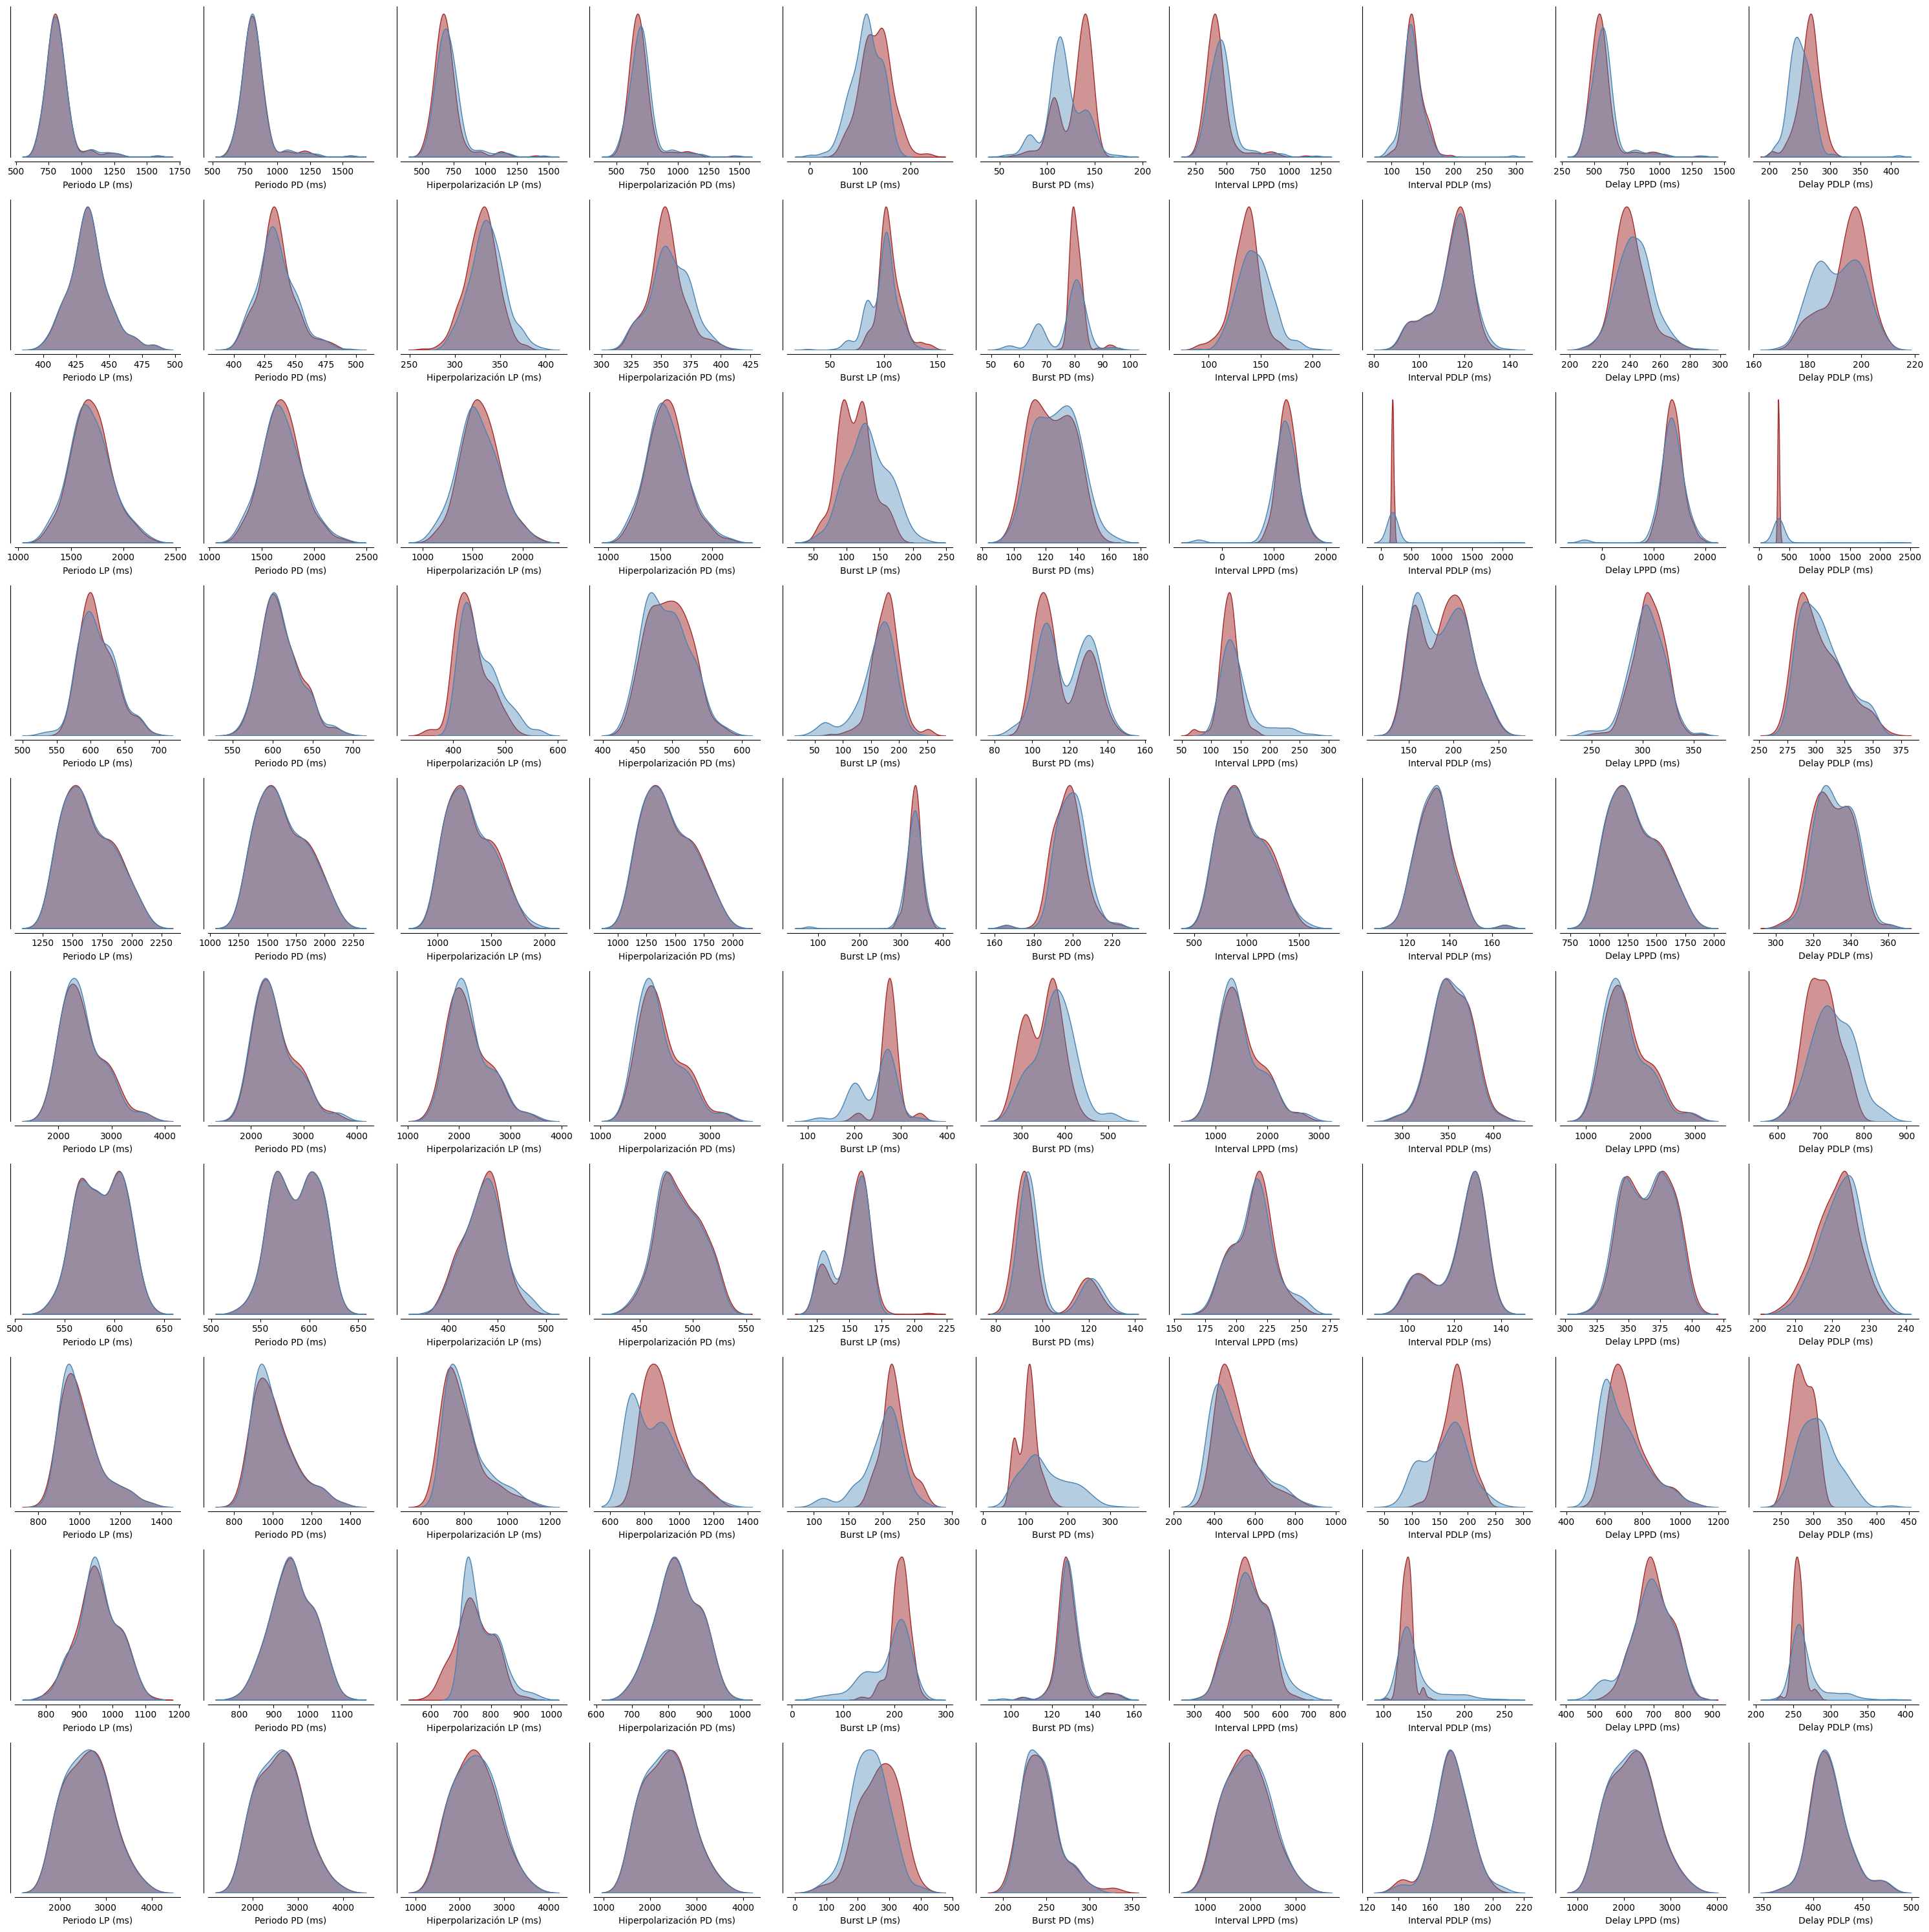

In [42]:
parameters_online = {"sub1.txt": [0.4, -2.7, -2.7, 4000, 4000, 500, 500, 470, 167],
                     "sub4.txt": [0.22, -3.9, -3.3, 2000, 2000, 220, 230, 500, 278],
                     "sub6.txt": [0.05, -3.5, -3.3, 10000, 10000, 550, 400, 889, 556],
                     "sub8.txt": [0.07, -3.2, -3.2, 4000, 4000, 600, 300, 778, 389],
                     "sub10.txt": [0.7, 3.1, 3.1, 9000, 8000, 500, 550, 500, 167],
                     "sub12.txt": [0.35,-0.7, -0.7, 10000, 9000, 800, 1100, 1467, 367],
                     "sub13.txt": [0.35, 1.8, 2, 3000, 3000, 350, 300, 389, 111],
                     "sub14.txt": [0.4, -3.8, -3.7, 7000, 7000, 500, 600, 833, 367],
                     "sub15.txt": [0.12, -4.3, -4.1, 7000, 6000, 650, 500, 222, 1],
                     "sub16.txt": [0.4, -3.8, -3.75, 9000, 9000, 800, 550, 833, 444]
                     }


parameters_offline = {"sub1.txt": [0.25, 4, 0.35, 0.20, 4, -2.8, 800, 400, 470, 167],
        "sub4.txt": [0.15, 4, 0.25, 0.15, 4, -4.1, 400, 300, 500, 278],
        "sub6.txt": [0.05, 4, 0.05, 0.25, 4, -3.5, 400, 400, 889, 556],
        "sub8.txt": [0.05, 4, 0.05, 0.25, 4, -3.5, 500, 1200, 778, 389],
        "sub10.txt": [0.5, 4, 0.6, 0.75, 4, 2.75, 1000, 1000, 500, 167],
        "sub12.txt": [0.2, 4, 0.25, 0.5, 4, -1.5, 1000, 1000, 1467, 367],
        "sub13.txt": [0.4, 4, 0.41, 0.4, 4, 1.75, 700, 1000, 389, 111],
        "sub14.txt": [0.3, 4, 0.4, 0.25, 4, -4, 1000, 1000, 833, 367],
        "sub15.txt": [0.1, 4, 0.12, 0.25, 4, -4.3, 1300, 5000, 222, 1],
        "sub16.txt": [0.45, 4, 0.3, 0.25, 4, -4, 985, 5000, 833, 444]}

first_neuron = 'PD'

method = 'Delayed'


dict = Offline_Online_Comparison(parameters_online, parameters_offline, first_neuron)

In [ ]:
pd.DataFrame(dict)

Campaign  Mean error Start PD Burst  Mean error End PD Burst  \
0   sub1.txt                  18.281106                 3.482719   
1   sub4.txt                   3.728511                 0.617585   
2   sub6.txt                   1.461735                 1.363520   
3   sub8.txt                   1.129252                 2.568027   
4  sub10.txt                   1.541284                 0.000000   
5  sub12.txt                  28.801370                 1.171233   
6  sub13.txt                   1.526144                 0.000000   
7  sub14.txt                  21.960674                24.584270   
8  sub15.txt                  29.654255                 0.000000   
9  sub16.txt                   0.952206                 0.930147   

   Mean error Start LP Burst  Mean error End LP Burst  \
0                   1.766129                18.919355   
1                   0.284504                 8.941662   
2                   3.451531                23.144133   
3                   2.346939                15.785714   
4                   0.091743                 3.137615   
5                   0.191781                31.835616   
6                   0.222222                 2.683007   
7                   4.365169                14.224719   
8                  10.489362                12.845745   
9                   0.104779                30.455882   

   Max error Start PD Burst  Max error End PD Burst  Max error Start LP Burst  \
0                   62.5000                72.75000                 174.25000   
1                   14.1875                19.09375                   0.59375   
2                    3.5000                48.75000                 325.75000   
3                   19.0000                31.00000                  72.00000   
4                    2.0000                 0.00000                   2.00000   
5                  234.0000                 1.50000                   0.50000   
6                    2.0000                 0.00000                   1.00000   
7                  144.0000               121.00000                  72.00000   
8                   47.0000                 0.00000                 118.00000   
9                    1.7500                63.25000                   0.25000   

   Max error End LP Burst  Time from peak to detection End Burst LP  \
0                247.7500                                 50.434633   
1                 72.6875                                 22.000000   
2                398.6250                                 55.123724   
3                164.0000                                 60.129252   
4                286.0000                                 50.477064   
5                161.5000                                 80.000000   
6                 76.0000                                 35.000000   
7                106.0000                                 50.000000   
8                144.0000                                 65.223404   
9                131.6250                                 80.000000   

   Time from peak to detection End Burst PD  Total online processing time  \
0                                 51.678899                      0.480321   
1                                 23.788665                      0.452120   
2                                 47.047194                      0.401965   
3                                 48.438776                      0.455978   
4                                 60.220183                      0.429984   
5                                110.000000                      0.528096   
6                                 34.091503                      0.539282   
7                                 65.488764                      0.439322   
8                                 52.313830                      0.437984   
9                                 63.687500                      0.396979   

   Per point online processing time  
0                      2.670927e-07  
1                      2.5156

In [ ]:


campaign = parameters[Data[13:]]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

prominence_LP_1 = campaign[0]
prominence_LP_2 = campaign[1]
height_LP = campaign[2]
prominence_PD_1 = campaign[3]
prominence_PD_2 = campaign[4]
height_PD = campaign[5]
dist_LP = campaign[6]*t_cut
dist_PD = campaign[7]*t_cut

t, V_PD, V_LP, slices_PD_off, slices_LP_off, Intervals_off = Get_Intervals_Offline(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)

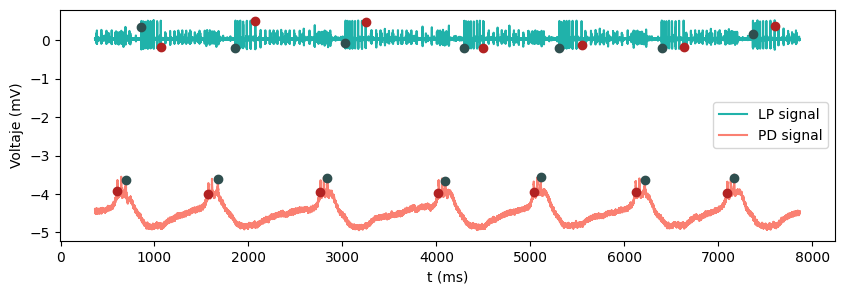

In [ ]:
Plot_Spikes_Online(t, V_PD, V_LP, t_PD, t_LP, 0, 75000)

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

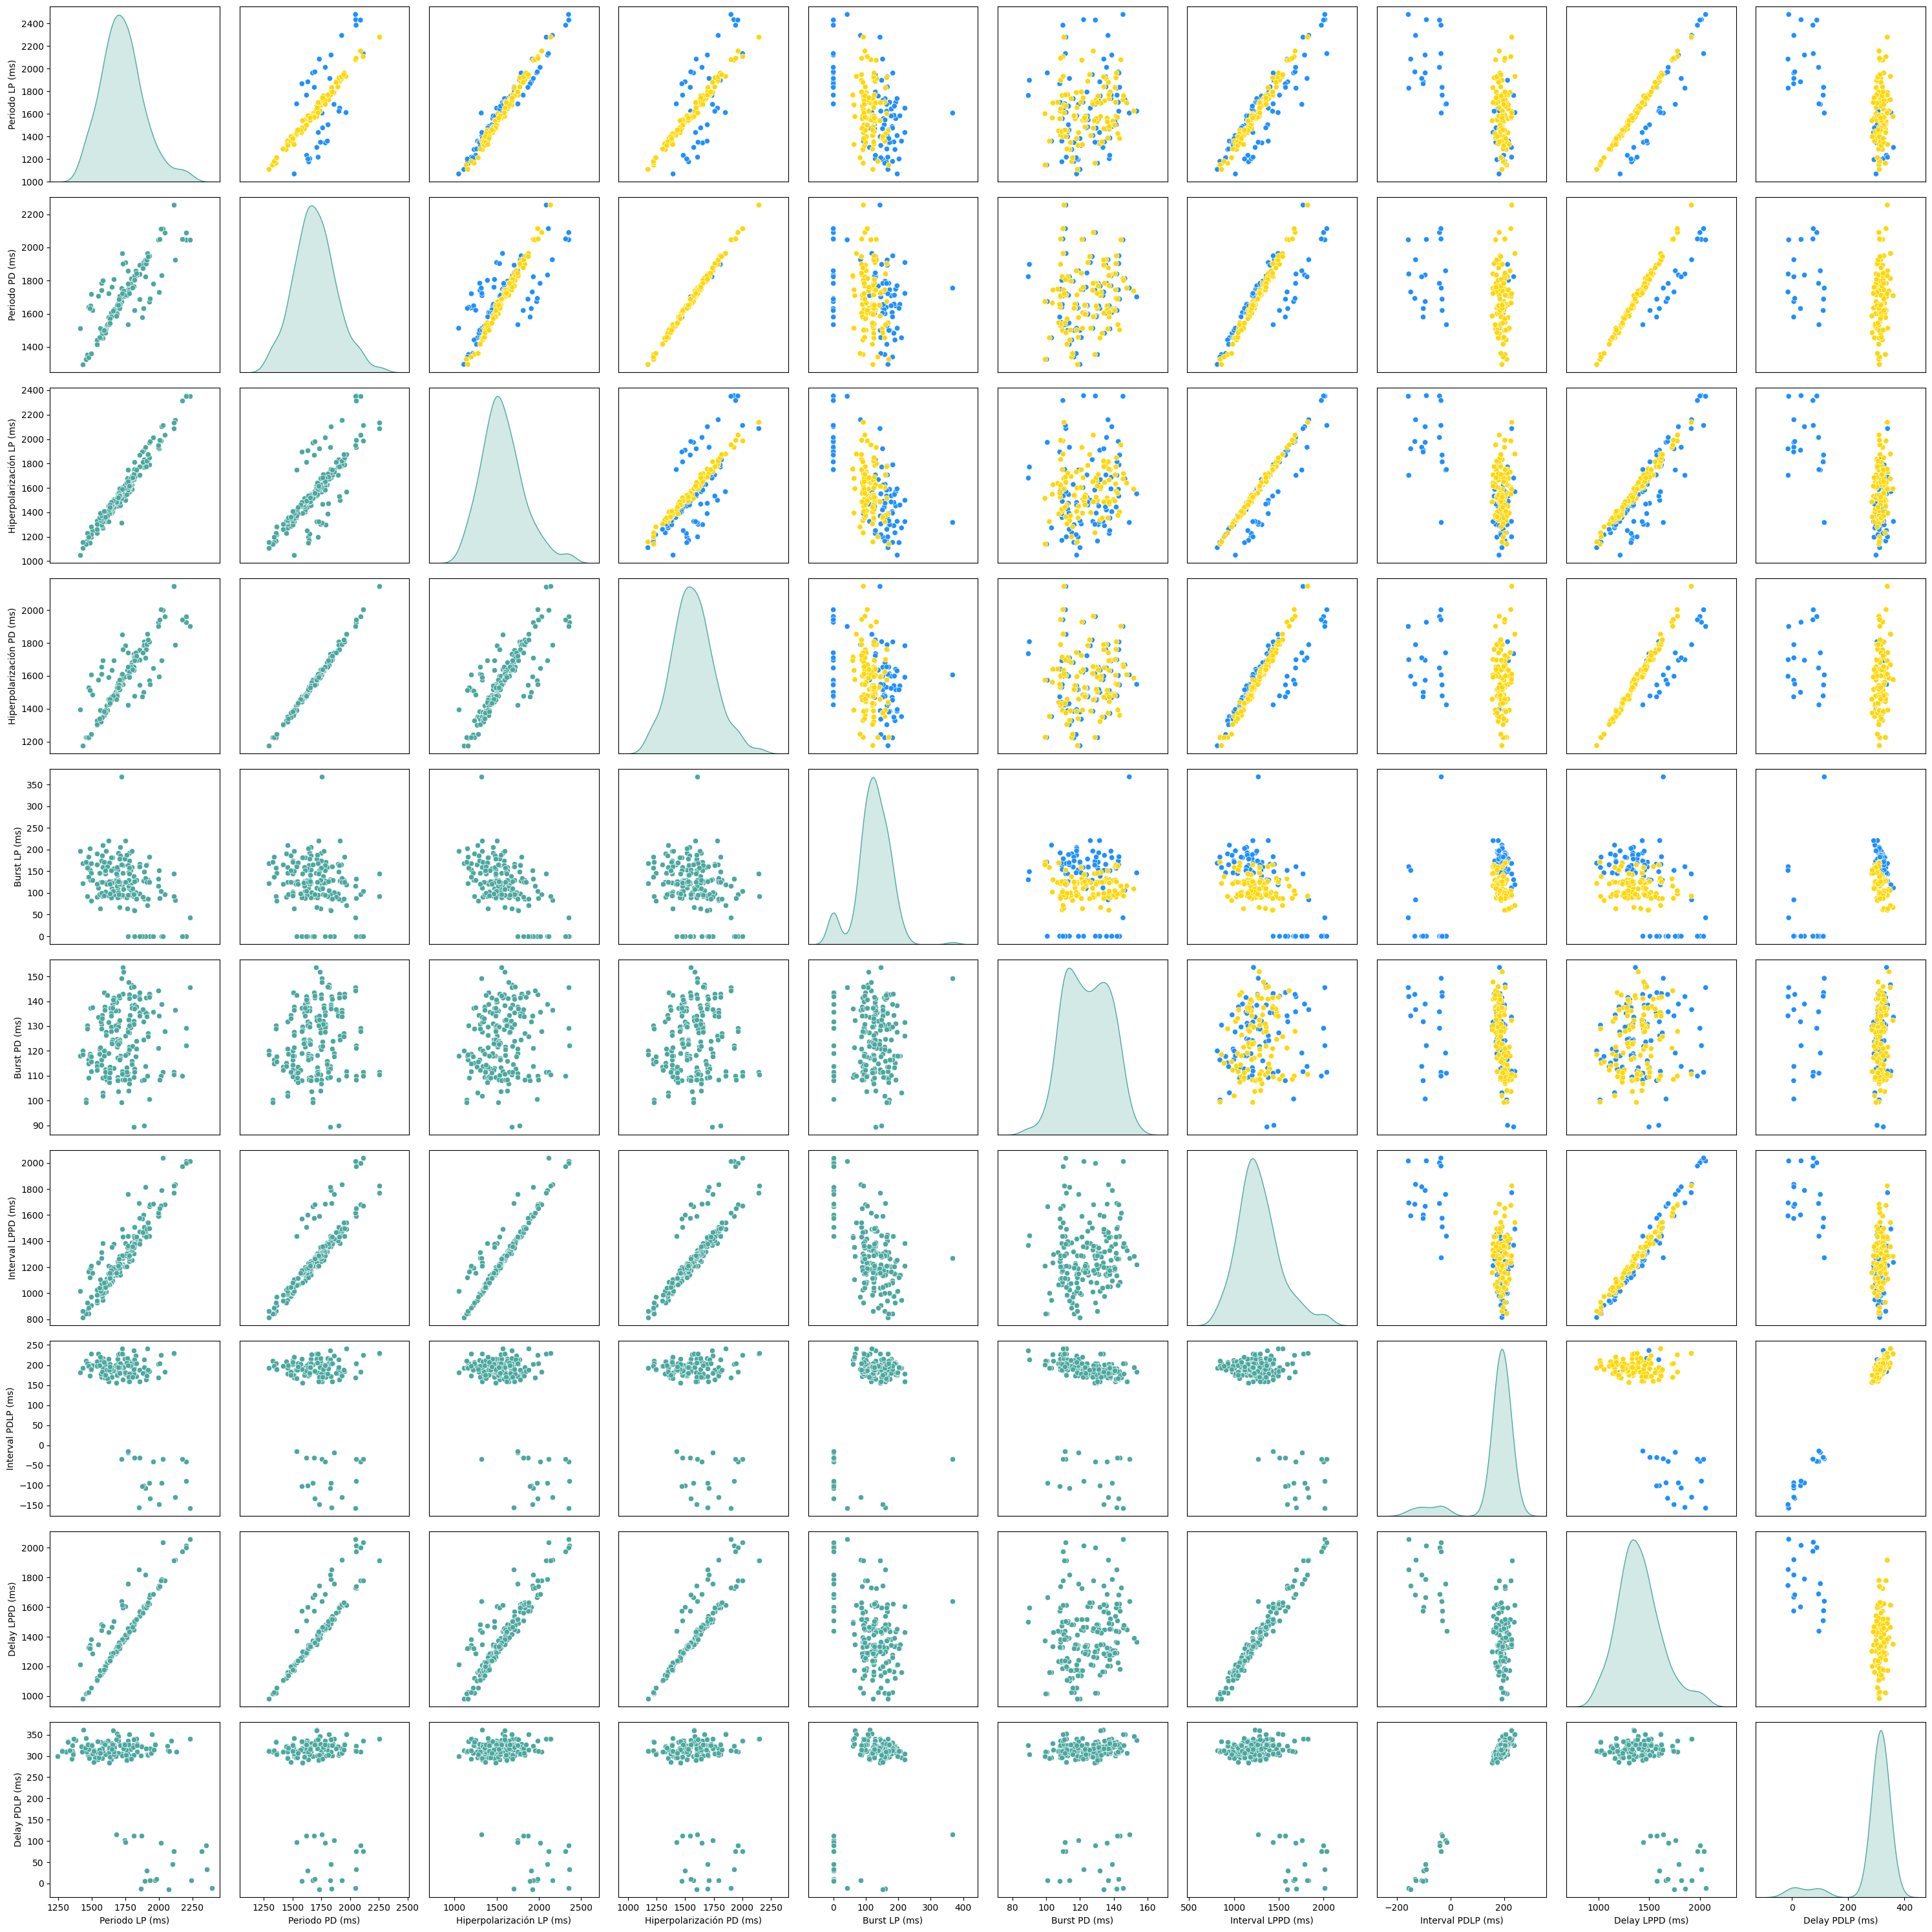

In [ ]:
merged_Intervals = np.concatenate((Intervals, Intervals_off), axis=0)
Hue = np.concatenate((np.ones(len(Intervals)),np.zeros(len(Intervals_off))))
Interval_Pairplot(merged_Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue=Hue)

## Offline VS Delayed VS Instant

In [ ]:
Data = '../robot/txt/sub16.txt'

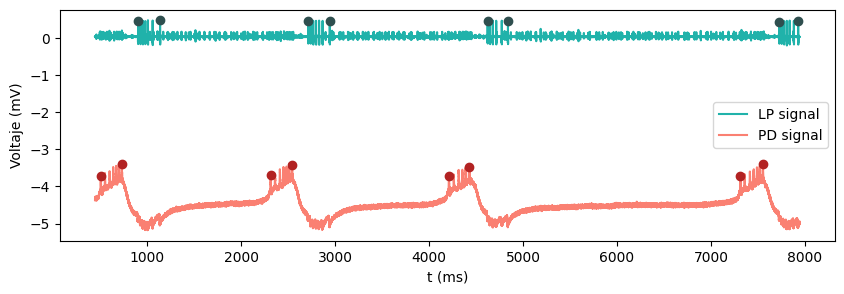

In [ ]:
Plot_Spikes_Offline(t, V_PD, V_LP, slices_PD, slices_LP, 0, 75000)

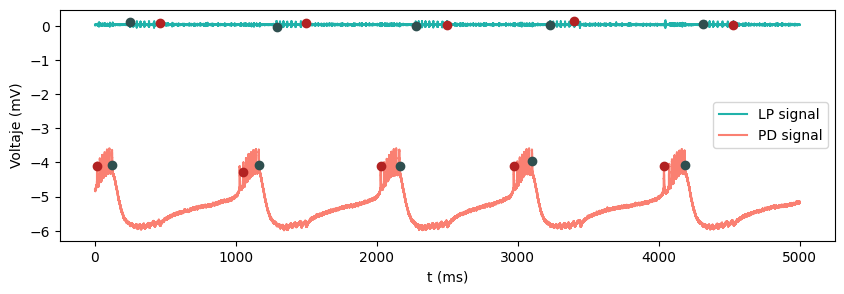

In [ ]:
Plot_Spikes_Online(t, V_PD, V_LP, t_PD_del, t_LP_del, 0, 50000)

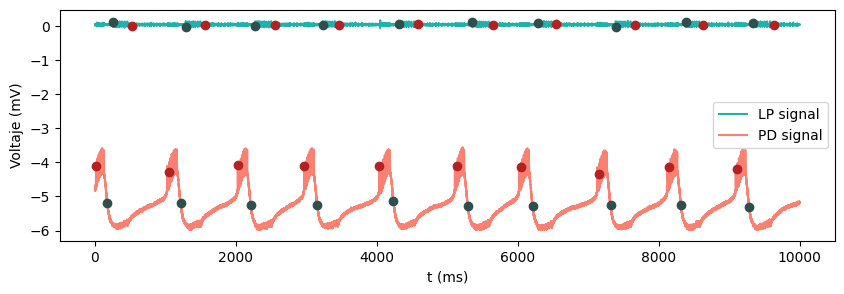

In [ ]:
Plot_Spikes_Online(t, V_PD, V_LP, t_PD_ins, t_LP_ins, 0, 100000)

In [ ]:
Data = '../robot/txt/sub15.txt'


parameters_online = {"sub1.txt": [0.4, -2.7, -2.7, 4000, 4000, 490, 400, 470, 167],
                     "sub4.txt": [0.22, -3.9, -3.3, 2000, 2000, 220, 230, 500, 278],
                     "sub6.txt": [0.05, -3.5, -3.3, 10000, 10000, 550, 400, 889, 556],
                     "sub8.txt": [0.07, -3.3, -3.2, 4000, 5000, 500, 300, 778, 389],
                     "sub10.txt": [0.7, 3.1, 3.1, 9000, 8000, 500, 550, 500, 167],
                     "sub12.txt": [0.35,-0.7, -0.7, 10000, 10000, 800, 1100, 1467, 367],
                     "sub13.txt": [0.4, 1.8, 2, 3000, 3000, 350, 300, 389, 111],
                     "sub14.txt": [0.4, -3.8, -3.7, 7000, 7000, 500, 600, 833, 367],
                     "sub15.txt": [0.12, -4.1, -4.1, 7000, 6000, 600, 500, 222, 1],
                     "sub16.txt": [0.4, -3.8, -3.7, 9000, 9000, 800, 550, 833, 444]
                     }

first_neuron = 'PD'


campaign = parameters_online[Data[13:]]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

spiking_height_LP = campaign[0]
spiking_height_PD_1 = campaign[1]
spiking_height_PD_2 = campaign[2]
min_period_LP = campaign[3]*t_cut
min_period_PD = campaign[4]*t_cut
max_burst_LP = campaign[5]*t_cut
max_burst_PD = campaign[6]*t_cut


method = 'Instant'


t, V_PD, V_LP, t_PD_ins, t_LP_ins, processing_time, Intervals,  t_detect_LP, t_detect_PD = Get_Intervals_Online(method, Data, t_cut, spiking_height_LP, spiking_height_PD_1, spiking_height_PD_2, min_period_LP, min_period_PD, max_burst_LP, max_burst_PD)


method = 'Delayed'
t, V_PD, V_LP, t_PD_del, t_LP_del, processing_time, Intervals,  t_detect_LP, t_detect_PD = Get_Intervals_Online(method, Data, t_cut, spiking_height_LP, spiking_height_PD_1, spiking_height_PD_2, min_period_LP, min_period_PD, max_burst_LP, max_burst_PD)



PD ini 189
PD fini 189
LP ini 189
LP fini 188
PD ini 189
PD fini 189
LP ini 189
LP fini 188
